In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load data
data = pd.read_csv('D:\\MBA\\Semester 4\\Project\\Data(TM)\\Python implementation\\Cleaned_Data_Final.csv')

# 2. Feature selection (replace with your actual feature columns)
feature_cols = [
    'Yearly_avg_comment_on_travel_page',
    'Yearly_avg_view_on_travel_page',
    'total_likes_on_outstation_checkin_given',
    'yearly_avg_Outstation_checkins',
    'member_in_family',
    # add more relevant features as needed
]
X = data[feature_cols]
y = data['Taken_product']  # updated target variable

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          No       0.84      1.00      0.91      1968
         Yes       0.00      0.00      0.00       376

    accuracy                           0.84      2344
   macro avg       0.42      0.50      0.46      2344
weighted avg       0.70      0.84      0.77      2344

Confusion Matrix:
 [[1968    0]
 [ 376    0]]


c:\Users\sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

As of now the Data is imbalanced 

In [9]:
print(data['Taken_product'].value_counts())

No     9824
Yes    1896
Name: Taken_product, dtype: int64


In [10]:
print(np.unique(y_pred, return_counts=True))

(array(['No'], dtype=object), array([2344], dtype=int64))


In [11]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [15]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.8 MB 3.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/15.8 MB 3.5 MB/s eta 0:00:05
   ---- ----------------------------------- 1.8/15.8 MB 3.5 MB/s eta 0:00:05
   ------ --------------------------------- 2.6/15.8 MB 3.3 MB/s eta 0:00:05
   ------- -------------------------------- 3.1/15.8 MB 3.3 MB/s eta 0:00:04
   --------- ------------------------------ 3.9/15.8 MB 3.2 MB/s eta 0:00:04
   ----------- ---------------------------- 4.7/15.8 MB 3.3 MB/s eta 0:00:04
   ------------- -------------------------- 5.2/15.8 MB 3.3 MB/s eta 0:00:04
   --------------- ------------------------ 6.3/15.8 MB 3.4 MB/s eta 0:00:03
   ------------------- -------------------- 7.9/15.8 MB 3.8 MB/s eta 0:00:03
   ---------------------- ----------------- 8.9/15.8 MB 4.0 MB/s eta 0:00:02
   -------------------------- ------------- 10.5/15.8 MB 4.2 MB/s eta 0:00:02
   --

  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          No       0.84      1.00      0.91      1968
         Yes       0.00      0.00      0.00       376

    accuracy                           0.84      2344
   macro avg       0.42      0.50      0.46      2344
weighted avg       0.70      0.84      0.77      2344

Confusion Matrix:
 [[1968    0]
 [ 376    0]]


c:\Users\sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sneha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Your model is still predicting **only the majority class ("No")** for all test samples, even after using SMOTE. Hence trying to check with different model 


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

          No       0.98      0.98      0.98      1968
         Yes       0.92      0.89      0.90       376

    accuracy                           0.97      2344
   macro avg       0.95      0.94      0.94      2344
weighted avg       0.97      0.97      0.97      2344

[[1937   31]
 [  41  335]]


This output shows that your **Random Forest model** is performing much better than Logistic Regression for the imbalanced data:


- Random Forest model is able to **detect both classes well**, including the minority class ("Yes").
- The model is **not biased toward the majority class** anymore.
- **Precision and recall for both classes are high**, indicating a balanced and effective model.


total_likes_on_outstation_checkin_given    0.376483
Yearly_avg_view_on_travel_page             0.257311
Yearly_avg_comment_on_travel_page          0.160333
yearly_avg_Outstation_checkins             0.129739
member_in_family                           0.076135
dtype: float64


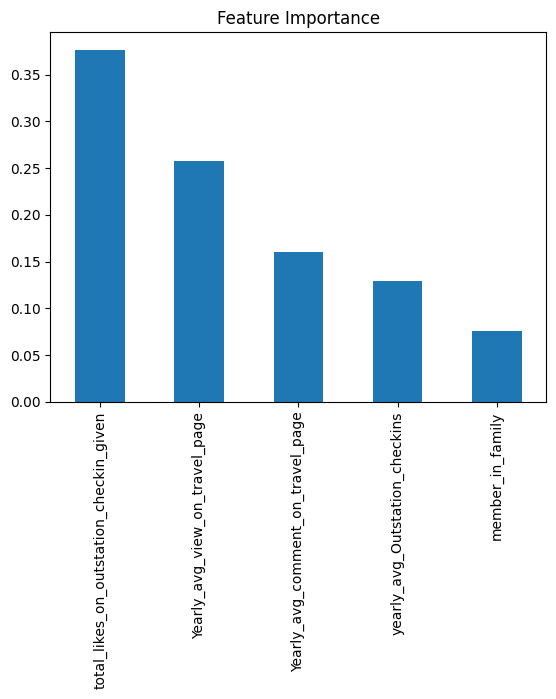

In [19]:
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
print(feature_importance)
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

 Each bar represents how much a particular feature contributed to the model’s decision-making process for predicting whether a user took the product. Features with higher importance scores had a greater impact on the model’s predictions, helping to identify which aspects of user engagement and behavior are most influential in driving ticket purchase decisions. This insight can guide airlines to focus their marketing efforts on the most impactful engagement metrics.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Decision Tree model on the resampled data
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.97      0.97      1968
         Yes       0.84      0.88      0.86       376

    accuracy                           0.95      2344
   macro avg       0.91      0.92      0.92      2344
weighted avg       0.95      0.95      0.95      2344

Confusion Matrix:
 [[1905   63]
 [  46  330]]



- The Decision Tree model is **performing very well** for both classes.
- It is able to **detect the minority class ("Yes")** with high recall (0.88) and good precision (0.84).
- The model is **not biased toward the majority class** and provides a balanced performance.
- **Overall accuracy is high (95%)**, indicating strong predictive power.


- **Overall Performance:**  
  Both models perform very well, but the **Random Forest** has slightly higher accuracy, precision, recall, and F1-score for both classes, especially for the minority class ("Yes").

- **Minority Class Detection:**  
  - **Random Forest** detects more true positives for "Yes" (335 vs. 330) and has fewer false negatives (41 vs. 46) compared to the Decision Tree.
  - **Precision and recall for "Yes"** are higher in Random Forest, meaning it is better at correctly identifying users who took the product.

- **Generalization:**  
  - **Random Forest** is an ensemble of many decision trees, which helps it generalize better and avoid overfitting.
  - **Decision Tree** is more prone to overfitting and may not perform as well on unseen data.

- **Interpretability:**  
  - **Decision Tree** is easier to interpret and visualize.
  - **Random Forest** is less interpretable but provides more robust and reliable predictions.

  ## **Conclusion**
  - **Random Forest** is the better model for your data, offering higher accuracy and better detection of both classes, especially the minority class.
  - **Decision Tree** is still a strong model and useful for understanding feature splits, but for deployment or business decisions, Random Forest is preferred due to its superior performance.



### **Model Validation**


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5, scoring='f1_weighted')
print("Cross-validated F1 scores:", scores)
print("Mean F1 score:", scores.mean())

Cross-validated F1 scores: [0.93504994 0.96312288 0.98216236 0.98030489 0.94831859]
Mean F1 score: 0.9617917300718826


 **cross-validated F1 scores** show that your Random Forest model is performing **consistently well** across different splits of your data:

### **Analysis**

- **High and Stable Scores:**  
  All F1 scores are above 0.93, with a mean of ~0.96. This indicates your model is robust and not overfitting to any particular fold.
- **Low Variance:**  
  The scores do not fluctuate much, showing your model generalizes well to unseen data.
- **F1 Score:**  
  The F1 score balances precision and recall, which is especially important for imbalanced datasets like yours.

In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

# Fit on the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.9749222973821372
Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.98      0.98      1968
         Yes       0.92      0.89      0.91       376

    accuracy                           0.97      2344
   macro avg       0.95      0.94      0.94      2344
weighted avg       0.97      0.97      0.97      2344

Confusion Matrix:
 [[1938   30]
 [  40  336]]


The tuned Random Forest model maintains excellent performance on both classes, especially the minority class ("Yes").
High precision and recall for both classes indicate the model is both accurate and reliable.
The model is well-balanced and generalizes well, as shown by the high cross-validated F1 score and strong test results.

In [23]:
import joblib

# Save the model
joblib.dump(best_rf, 'random_forest_model.pkl')

# To load the model later:
# loaded_model = joblib.load('random_forest_model.pkl')

['random_forest_model.pkl']

In [24]:
joblib.dump(smote, 'smote_object.pkl')

['smote_object.pkl']

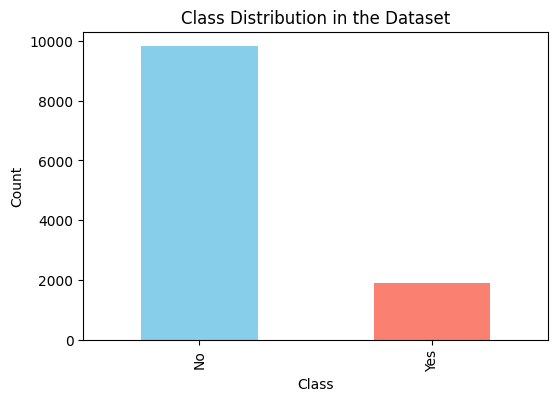

In [26]:
import matplotlib.pyplot as plt

class_counts = data['Taken_product'].value_counts()
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The dataset is highly imbalanced, with a much larger number of "No" responses compared to "Yes". This imbalance can negatively impact model performance, making it important to apply techniques like SMOTE to ensure both classes are learned effectively.

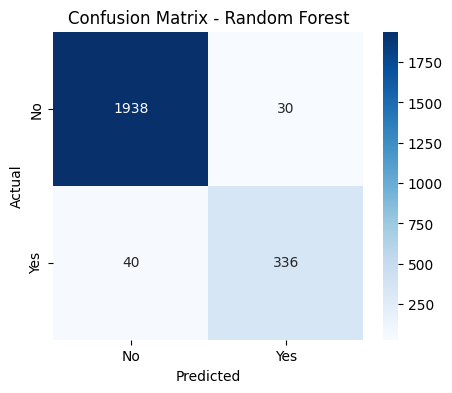

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Random Forest model performs very well, with high precision and recall for both classes. The confusion matrix shows that the model correctly identifies most "Yes" and "No" cases, with very few misclassifications. This indicates the model is reliable for predicting product uptake.

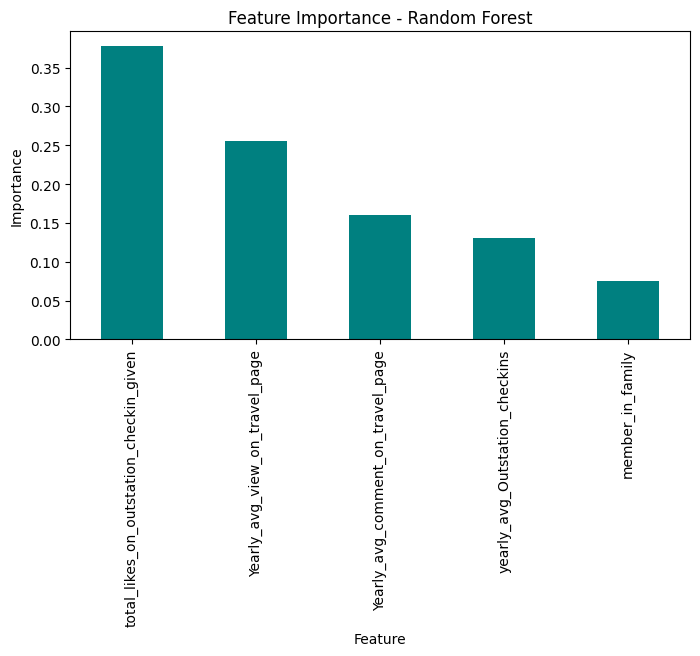

In [28]:
feature_importance = pd.Series(best_rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(8,4))
feature_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

The "total likes on outstation check-ins given" and "Yearly average view on travel page" are the most influential features in predicting product uptake. This insight can help the airline focus its marketing efforts on customers who are highly engaged with these activities.